In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing

#dataset owner:jerryyyyy708
#https://youtube.com/channel/UCLi9jBe_Jzo1vPjULRpCj7Q
data="./dataset/YT_revenue_old.csv"

#load dataset and discard useless features
df=pd.read_csv(data,sep=',')
df=df.drop(columns=['Video title'])
df=df.drop(columns=['Video publish time'])
df=df.drop(columns=['Video'])
#df=df.drop(columns=['Dislikes'])
df=df.drop(columns=['Comments added'])
df=df.drop(columns=['Shares'])
#df=df.drop(columns=['Subscribers gained'])
#df=df.drop(columns=['Likes'])
df=df.dropna()
df=df.drop(df.index[-1])
df=df.drop(df.index[0])
df.drop(df[df['YouTube ad revenue (TWD)']==0].index,inplace=True)
df=shuffle(df,random_state=1)
labels=[]

#labeling the data with 4 levels
for i in df['YouTube ad revenue (TWD)']:
    if(i>=3000):
        labels.append(3)
    elif(i>=2000):
        labels.append(2)
    elif(i>=1000):
        labels.append(1)
    else:
        labels.append(0)
df

,Views,Watch time (hours),Likes,Dislikes,Subscribers gained,YouTube ad revenue (TWD)
40,27092,2688.2887,281,17,69,6459.366
171,13280,1350.8324,214,13,25,2868.319
95,14927,1356.4006,252,7,39,2095.873
63,22563,2140.9237,373,22,55,6851.408
200,8146,656.9761,120,3,15,1296.188
...,...,...,...,...,...,...
205,7183,649.7622,123,7,16,571.974
139,6134,827.1954,128,8,24,285.203
74,7638,675.5352,132,6,21,1568.767
142,14145,1406.9752,252,11,20,2842.604


Fold 1
Accuracy: 0.41509433962264153
Confusion Matrix:
[[ 7  4  0  0]
 [ 2  8  3  1]
 [ 0 11  1  4]
 [ 2  1  3  6]]
Precision Score of Each Label: [0.63636364 0.33333333 0.14285714 0.54545455]
Recall Score of Each Label: [0.63636364 0.57142857 0.0625     0.5       ]

Fold 2
Accuracy: 0.5660377358490566
Confusion Matrix:
[[10  4  0  0]
 [ 2  9  3  0]
 [ 0  7  1  5]
 [ 0  2  0 10]]
Precision Score of Each Label: [0.83333333 0.40909091 0.25       0.66666667]
Recall Score of Each Label: [0.71428571 0.64285714 0.07692308 0.83333333]

Fold 3
Accuracy: 0.4716981132075472
Confusion Matrix:
[[ 6  1  1  0]
 [ 7  6 11  2]
 [ 0  2  5  4]
 [ 0  0  0  8]]
Precision Score of Each Label: [0.46153846 0.66666667 0.29411765 0.57142857]
Recall Score of Each Label: [0.75       0.23076923 0.45454545 1.        ]

Final Test Set Results
Accuracy: 0.6521739130434783
Confusion Matrix:
[[11  1  0  0]
 [ 1 17  3  1]
 [ 0  5  3  3]
 [ 0  2  8 14]]
Precision Score of Each Label [0.91666667 0.68       0.21428571 0.7

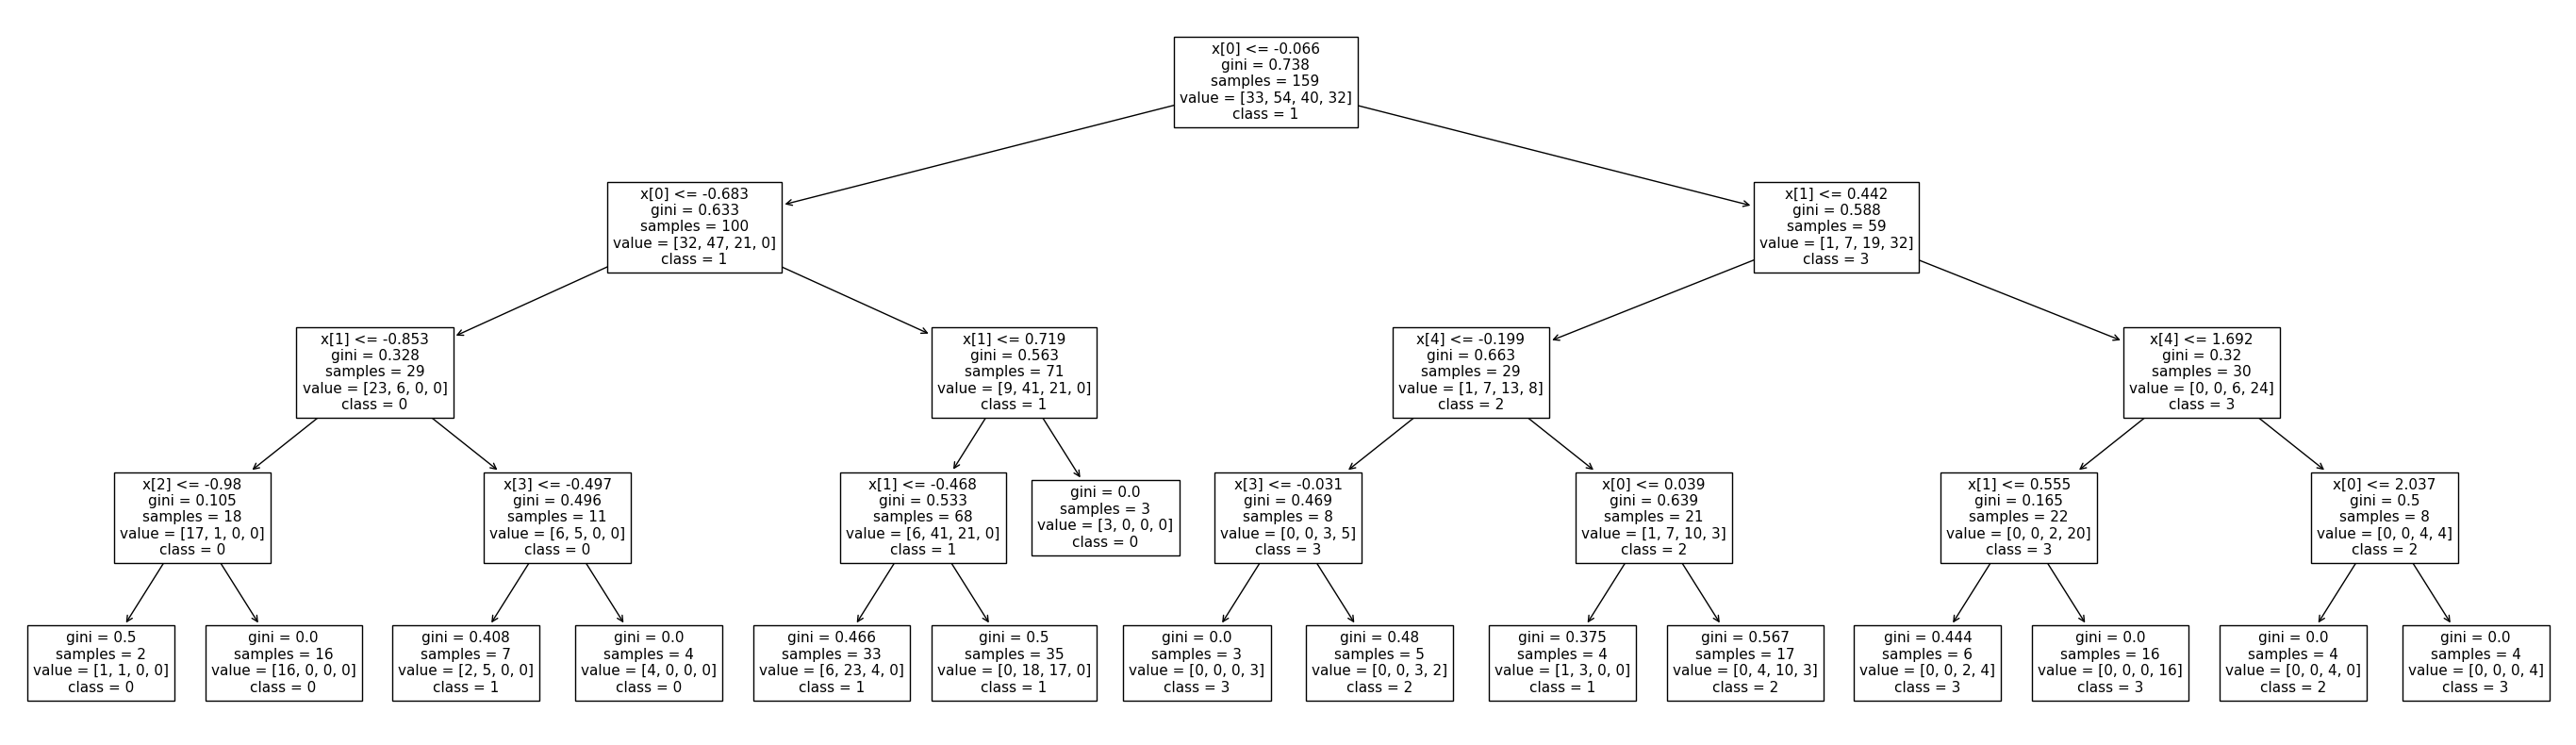

In [14]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# 假設 df 和 labels 已經被定義
features = df.iloc[:, 0:5]
target = labels

# 正規化特徵
features = preprocessing.scale(features)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
y_train = np.array(y_train)

# K-Fold 交叉驗證
kf = KFold(n_splits=3, random_state=1, shuffle=True)

fold = 0
for train_index, valid_index in kf.split(X_train):
    fold += 1
    X_train_fold, X_valid_fold = X_train[train_index], X_train[valid_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[valid_index]

    # 創建模型並訓練
    model = DecisionTreeClassifier(max_depth=4, random_state=1)
    model.fit(X_train_fold, y_train_fold)
    ypredict = model.predict(X_valid_fold)

    # 顯示結果
    print(f"Fold {fold}")
    print("Accuracy:", accuracy_score(y_valid_fold, ypredict))
    print("Confusion Matrix:")
    print(confusion_matrix(y_valid_fold, ypredict))
    print("Precision Score of Each Label:", precision_score(y_valid_fold, ypredict, average=None))
    print("Recall Score of Each Label:", recall_score(y_valid_fold, ypredict, average=None))
    print()

# 最終在測試集上測試
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)
ypredict = model.predict(X_test)

# 顯示測試集結果
print("Final Test Set Results")
print("Accuracy:", model.score(X_test, y_test))
fig = plt.figure(figsize=(35,10))
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypredict))
print("Precision Score of Each Label", precision_score(y_test, ypredict, average=None))
print("Recall Score of Each Label", recall_score(y_test, ypredict, average=None))

_ = tree.plot_tree(model, class_names=['0', '1', '2', '3'])


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn import preprocessing
import numpy as np

# 假設 df 和 labels 已經被定義
features = df.iloc[:, 0:5]
target = labels

# 正規化特徵
features = preprocessing.scale(features)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# 確保 y_train 是一個 Numpy Array
y_train = np.array(y_train)

# K-Fold 交叉驗證
kf = KFold(n_splits=4, random_state=1, shuffle=True)

fold = 0
for train_index, valid_index in kf.split(X_train):
    fold += 1
    X_train_fold, X_valid_fold = X_train[train_index], X_train[valid_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[valid_index]

    # 創建並訓練模型
    model = RandomForestClassifier(n_estimators=200, random_state=1)
    model.fit(X_train_fold, y_train_fold)
    ypredict = model.predict(X_valid_fold)

    # 顯示結果
    print(f"Fold {fold}")
    print("Accuracy:", accuracy_score(y_valid_fold, ypredict))
    print("Confusion Matrix:")
    print(confusion_matrix(y_valid_fold, ypredict))
    print("Precision Score of Each Label:", precision_score(y_valid_fold, ypredict, average=None))
    print("Recall Score of Each Label:", recall_score(y_valid_fold, ypredict, average=None))
    print()

# 最終在測試集上測試
model = RandomForestClassifier(n_estimators=200, random_state=1)
model.fit(X_train, y_train)
ypredict = model.predict(X_test)

# 顯示測試集結果
print("Final Test Set Results")
print("Accuracy:", model.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypredict))
print("Precision Score of Each Label", precision_score(y_test, ypredict, average=None))
print("Recall Score of Each Label", recall_score(y_test, ypredict, average=None))


Fold 1
Accuracy: 0.45652173913043476
Confusion Matrix:
[[ 6  5  0  0]
 [ 1  8  4  0]
 [ 0 10  1  1]
 [ 0  1  3  6]]
Precision Score of Each Label: [0.85714286 0.33333333 0.125      0.85714286]
Recall Score of Each Label: [0.54545455 0.61538462 0.08333333 0.6       ]

Fold 2
Accuracy: 0.6521739130434783
Confusion Matrix:
[[ 4  3  0  0]
 [ 3  9  4  0]
 [ 0  2  5  2]
 [ 0  0  2 12]]
Precision Score of Each Label: [0.57142857 0.64285714 0.45454545 0.85714286]
Recall Score of Each Label: [0.57142857 0.5625     0.55555556 0.85714286]

Fold 3
Accuracy: 0.6444444444444445
Confusion Matrix:
[[ 6  1  2  0]
 [ 2 10  6  1]
 [ 0  1  7  3]
 [ 0  0  0  6]]
Precision Score of Each Label: [0.75       0.83333333 0.46666667 0.6       ]
Recall Score of Each Label: [0.66666667 0.52631579 0.63636364 1.        ]

Fold 4
Accuracy: 0.6666666666666666
Confusion Matrix:
[[ 6  2  0  1]
 [ 1 10  2  1]
 [ 0  5  4  1]
 [ 0  0  2 10]]
Precision Score of Each Label: [0.85714286 0.58823529 0.5        0.76923077]
Recall

In [5]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

features=df.iloc[:,0:5]
target=labels

#normalize
features=preprocessing.scale(features)

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)
model=KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)

#show result
print("accuracy:",model.score(X_test, y_test))
print("confusion matrix:")
print(confusion_matrix(y_test, ypredict))
print("precision score of each label",precision_score(y_test,ypredict,average=None))
print("recall score of each label",recall_score(y_test,ypredict,average=None))

accuracy: 0.7246376811594203
confusion matrix:
[[11  1  0  0]
 [ 2 16  4  0]
 [ 0  3  7  1]
 [ 0  2  6 16]]
precision score of each label [0.84615385 0.72727273 0.41176471 0.94117647]
recall score of each label [0.91666667 0.72727273 0.63636364 0.66666667]


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
import numpy as np

# 假設 df 已經被定義
features = df.iloc[:, 0:5]
target = df.iloc[:, 5]

# 正規化特徵
features = preprocessing.scale(features)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# 確保 y_train 是一個 Numpy Array
y_train = np.array(y_train)

# K-Fold 交叉驗證
kf = KFold(n_splits=5, random_state=1, shuffle=True)

fold = 0
for train_index, valid_index in kf.split(X_train):
    fold += 1
    X_train_fold, X_valid_fold = X_train[train_index], X_train[valid_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[valid_index]

    # 創建並訓練模型
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_predict = model.predict(X_valid_fold)

    # 計算和顯示錯誤率
    average_err, average_rev, average_predict = 0, 0, 0
    for i in range(len(y_predict)):
        error = abs(y_predict[i] - y_valid_fold[i])
        average_predict += y_predict[i]
        average_err += error
        average_rev += y_valid_fold[i]

    average_err /= len(y_predict)
    average_rev /= len(y_predict)
    average_predict /= len(y_predict)

    print(f"Fold {fold}")
    print("Average Predict $:", average_predict)
    print("Average Revenue $:", average_rev)
    print("Average Error $:", average_err)
    print("Average Error %:", average_err / average_rev if average_rev != 0 else "N/A")
    print()

# 最終在測試集上測試
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# 計算和顯示測試集的錯誤率
average_err, average_rev, average_predict = 0, 0, 0
for i in range(len(y_predict)):
    error = abs(y_predict[i] - y_test.iloc[i])
    average_predict += y_predict[i]
    average_err += error
    average_rev += y_test.iloc[i]

average_err /= len(y_predict)
average_rev /= len(y_predict)
average_predict /= len(y_predict)

print("Final Test Set Results")
print("Average Predict $:", average_predict)
print("Average Revenue $:", average_rev)
print("Average Error $:", average_err)
print("Average Error %:", average_err / average_rev if average_rev != 0 else "N/A")


Fold 1
Average Predict $: 2042.3881639159943
Average Revenue $: 2230.1083750000003
Average Error $: 609.6130842041061
Average Error %: 0.2733558113309655

Fold 2
Average Predict $: 2321.622806218008
Average Revenue $: 2165.6026562500006
Average Error $: 833.6097178398401
Average Error %: 0.3849319797581588

Fold 3
Average Predict $: 2467.445526122886
Average Revenue $: 2417.26159375
Average Error $: 673.632726318553
Average Error %: 0.2786759728695801

Fold 4
Average Predict $: 1978.8716716780034
Average Revenue $: 1955.6120000000003
Average Error $: 506.7681747995309
Average Error %: 0.25913533707071285

Fold 5
Average Predict $: 1965.065815764345
Average Revenue $: 2072.603774193548
Average Error $: 557.4063986866604
Average Error %: 0.2689401638784276

Final Test Set Results
Average Predict $: 2405.7968358140024
Average Revenue $: 2716.6036666666664
Average Error $: 736.7348635119682
Average Error %: 0.271197036414207


In [11]:
#Predict other youtuber's revenue

#dataset owner: Holywater
#https://youtube.com/channel/UCTcFZIhUzvUR9c1HxDaQ1tg

data="holywater.csv"

df2=pd.read_csv(data,sep=',')
df2=df2.drop(columns=['Video title'])
df2=df2.drop(columns=['Video publish time'])
df2=df2.drop(columns=['Video'])
#df=df.drop(columns=['Dislikes'])
df2=df2.drop(columns=['Comments added'])
df2=df2.drop(columns=['Shares'])
df2=df2.drop(columns=['YouTube ad revenue (TWD)'])
#df=df.drop(columns=['Subscribers gained'])
#df=df.drop(columns=['Likes'])
df2=df2.dropna()

#normalize with the same scale of previous set
df3=pd.concat([df,df2])
features=df3.iloc[:,0:5]
features=preprocessing.scale(features)

y_predict=model.predict(features)

#show result
for i in range(238):
    if i >227:
        print("video",i-227,":",y_predict[i])


video 1 : 2266.9774957541636
video 2 : 1515.4884148283722
video 3 : 1347.0614004801228
video 4 : 1521.0581568750547
video 5 : 1717.3185997186922
video 6 : 1691.544310546653
video 7 : 1108.8236293301413
video 8 : 1283.855016389203
video 9 : 1011.2395734583631
video 10 : 1317.8417397587734
